<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Probabilidade" data-toc-modified-id="Probabilidade-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Probabilidade</a></span><ul class="toc-item"><li><span><a href="#Espaço-Amostral" data-toc-modified-id="Espaço-Amostral-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Espaço Amostral</a></span></li><li><span><a href="#Amostragem" data-toc-modified-id="Amostragem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Amostragem</a></span></li><li><span><a href="#Amostra" data-toc-modified-id="Amostra-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Amostra</a></span></li><li><span><a href="#Distribuições-de-Probabilidade" data-toc-modified-id="Distribuições-de-Probabilidade-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Distribuições de Probabilidade</a></span><ul class="toc-item"><li><span><a href="#Distribuição-de-Bernoulli" data-toc-modified-id="Distribuição-de-Bernoulli-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Distribuição de Bernoulli</a></span></li><li><span><a href="#Distribuição-Binomial" data-toc-modified-id="Distribuição-Binomial-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Distribuição Binomial</a></span></li><li><span><a href="#Distribuição-Geométrica" data-toc-modified-id="Distribuição-Geométrica-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Distribuição Geométrica</a></span></li><li><span><a href="#Distribuição-de-Poisson" data-toc-modified-id="Distribuição-de-Poisson-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Distribuição de Poisson</a></span></li><li><span><a href="#Distribuição-Exponencial" data-toc-modified-id="Distribuição-Exponencial-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Distribuição Exponencial</a></span></li><li><span><a href="#Teorema-do-Limite-Central" data-toc-modified-id="Teorema-do-Limite-Central-1.4.6"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>Teorema do Limite Central</a></span></li></ul></li></ul></li><li><span><a href="#Intervalo-de-Confiaça-e-RMSE" data-toc-modified-id="Intervalo-de-Confiaça-e-RMSE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Intervalo de Confiaça e RMSE</a></span><ul class="toc-item"><li><span><a href="#RMSE-e-Complexidade" data-toc-modified-id="RMSE-e-Complexidade-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>RMSE e Complexidade</a></span></li></ul></li></ul></div>

# Probabilidade

In [8]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from collections import Counter

## Espaço Amostral

O conjunto de valores distintos que uma R.V. pode assumir

In [2]:
moeda = ['cara', 'coroa']

## Amostragem

In [3]:
def jogar_moeda_justa():
    return np.random.choice(moeda)

In [18]:
jogar_moeda_justa()

'cara'

In [24]:
def jogar_moeda_injusta():
    return np.random.choice(moeda, p = [0.1, 0.9])

In [41]:
jogar_moeda_injusta()

'cara'

## Amostra

In [48]:
amostra_100 = [jogar_moeda_injusta() for i in range(100)]

In [49]:
amostra_100[0:5]

['coroa', 'coroa', 'coroa', 'coroa', 'coroa']

In [50]:
from collections import Counter

In [52]:
Counter(amostra_100)

Counter({'coroa': 93, 'cara': 7})

## Distribuições de Probabilidade

### Distribuição de Bernoulli

Espaço amostral: Booleano

<img src="bernoulli.jpg" alt="Drawing" style="width: 200px;"/>

In [66]:
amostra_justa = [jogar_moeda_justa() for i in range(10000)]
amostra_injusta = [jogar_moeda_injusta() for i in range(100)]

In [67]:
Counter(amostra_justa)

Counter({'coroa': 4958, 'cara': 5042})

In [68]:
pd.DataFrame([Counter(amostra_justa)])/10000

,coroa,cara
0,0.4958,0.5042


<AxesSubplot:>

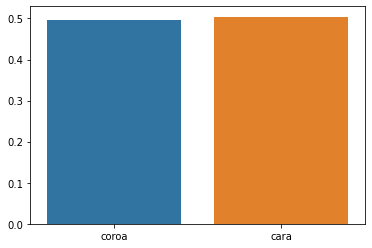

In [70]:
sns.barplot(data = pd.DataFrame([Counter(amostra_justa)])/10000)

In [71]:
Counter(amostra_injusta)

Counter({'coroa': 94, 'cara': 6})

<AxesSubplot:>

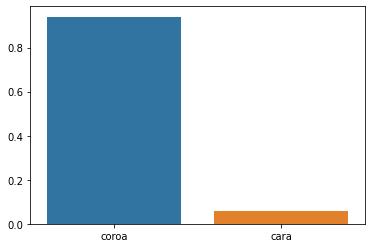

In [72]:
sns.barplot(data = pd.DataFrame([Counter(amostra_injusta)])/100)

### Distribuição Binomial

Espaço amostral: Inteiros >= 0

In [73]:
def numero_coroa_justa(amostras):
    amostra = [jogar_moeda_justa() for i in range(amostras)]
    return Counter(amostra)['coroa']

In [80]:
numero_coroa_justa(10)

4

In [98]:
amostra_binomial = [numero_coroa_justa(10) for i in range(10000)]

In [99]:
amostra_binomial[0:6]

[8, 5, 5, 6, 4, 5]

In [100]:
contagem_amostra = Counter(amostra_binomial)
contagem_amostra

Counter({8: 429,
         5: 2412,
         6: 2131,
         4: 2048,
         3: 1148,
         7: 1179,
         2: 435,
         1: 107,
         9: 91,
         10: 11,
         0: 9})

In [101]:
contagem_amostra = Counter(amostra_binomial)
tb_binom = pd.DataFrame({
    'num_coroas': contagem_amostra.keys(),
    'num_eventos': contagem_amostra.values()
})
tb_binom['prob_medida'] = tb_binom['num_eventos']/sum(tb_binom['num_eventos'])
tb_binom = tb_binom.sort_values('num_coroas')

In [102]:
tb_binom

,num_coroas,num_eventos,prob_medida
10,0,9,0.0009
7,1,107,0.0107
6,2,435,0.0435
4,3,1148,0.1148
3,4,2048,0.2048
1,5,2412,0.2412
2,6,2131,0.2131
5,7,1179,0.1179
0,8,429,0.0429
8,9,91,0.0091


<AxesSubplot:xlabel='num_coroas', ylabel='prob_medida'>

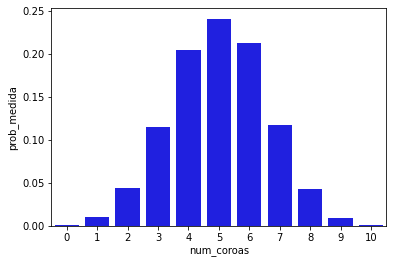

In [103]:
sns.barplot(data = tb_binom, x = 'num_coroas', y = 'prob_medida', color='blue')

In [104]:
dist_binomial = sp.stats.binom(10, 0.5)

<AxesSubplot:>

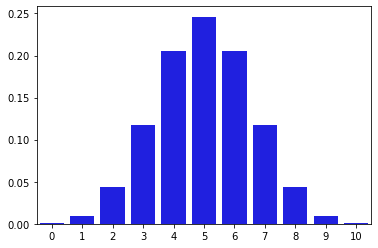

In [105]:
x = np.arange(0,11)
y = dist_binomial.pmf(x)
sns.barplot(x= x, y=y, color='blue')

Podemos usar a pmf (probability mass function, ou função massa de probabilidade) para calcular a probabilidade de uma dada contagem de eventos positivos:

In [106]:
dist_binomial.pmf(5)

0.24609375000000025

In [107]:
sum([dist_binomial.pmf(i) for i in [0, 1, 2]])

0.0546875

e podemos usar a função distribuição acumulada, ou C.D.F. (cumulative distribution function) para calcular a probabilidade de até N eventos:

In [108]:
dist_binomial.cdf(2)

0.054687500000000014

<AxesSubplot:>

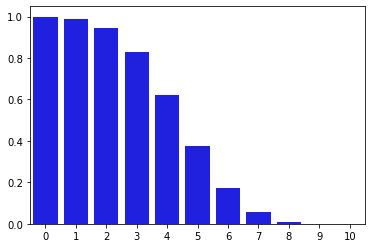

In [109]:
x = np.arange(0,11)
y = 1-dist_binomial.cdf(x)
sns.barplot(x= x, y=y, color='blue')

In [110]:
tb_binom.head()

,num_coroas,num_eventos,prob_medida
10,0,9,0.0009
7,1,107,0.0107
6,2,435,0.0435
4,3,1148,0.1148
3,4,2048,0.2048


In [111]:
tb_binom['prob_real'] = tb_binom['num_coroas'].apply(dist_binomial.pmf)

In [112]:
tb_binom

,num_coroas,num_eventos,prob_medida,prob_real
10,0,9,0.0009,0.000977
7,1,107,0.0107,0.009766
6,2,435,0.0435,0.043945
4,3,1148,0.1148,0.117188
3,4,2048,0.2048,0.205078
1,5,2412,0.2412,0.246094
2,6,2131,0.2131,0.205078
5,7,1179,0.1179,0.117188
0,8,429,0.0429,0.043945
8,9,91,0.0091,0.009766


<AxesSubplot:xlabel='num_coroas', ylabel='prob_real'>

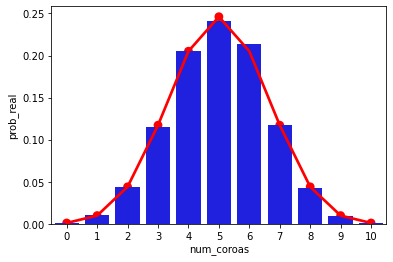

In [113]:
sns.barplot(data = tb_binom, x = 'num_coroas', y = 'prob_medida', color='blue')
sns.pointplot(data = tb_binom, x = 'num_coroas', y = 'prob_real', color = 'red')

### Distribuição Geométrica

Espaço amostral: Inteiros positivos (> 0)

In [114]:
def primeira_coroa_justa():
    i = 0
    while True:
        if jogar_moeda_justa() == 'coroa':
            i += 1
            return i
        else:
            i += 1

In [121]:
primeira_coroa_justa()

1

In [139]:
amostra_geo = [primeira_coroa_justa() for i in range(100)]

In [140]:
amostra_geo[1:10]

[1, 2, 2, 1, 2, 2, 1, 1, 2]

In [141]:
contagem_amostra = Counter(amostra_geo)
tb_geo = pd.DataFrame({
    'num_primeira_coroa': contagem_amostra.keys(),
    'num_eventos': contagem_amostra.values()
})
tb_geo = tb_geo.sort_values('num_primeira_coroa')

In [142]:
tb_geo

,num_primeira_coroa,num_eventos
0,1,48
1,2,27
2,3,17
3,4,3
5,5,2
4,6,3


<AxesSubplot:xlabel='num_primeira_coroa', ylabel='num_eventos'>

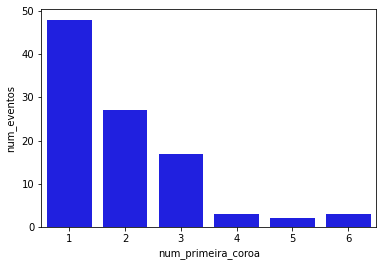

In [143]:
sns.barplot(data = tb_geo, x = 'num_primeira_coroa', y = 'num_eventos', color = 'blue')

In [144]:
dist_geom = sp.stats.geom(0.5)

In [145]:
tb_geo['prob_medida'] = tb_geo['num_eventos']/sum(tb_geo['num_eventos'])
tb_geo['prob_real'] = tb_geo['num_primeira_coroa'].apply(dist_geom.pmf)

<AxesSubplot:xlabel='num_primeira_coroa', ylabel='prob_real'>

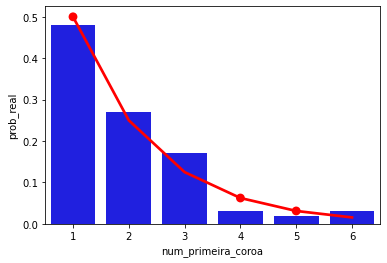

In [146]:
sns.barplot(data = tb_geo, x = 'num_primeira_coroa', y = 'prob_medida', color = 'blue')
sns.pointplot(data = tb_geo, x = 'num_primeira_coroa', y = 'prob_real', color = 'red')

### Distribuição de Poisson

<img src="poisson.jpg" alt="Drawing" style="width: 200px;"/>

In [147]:
evento_raro = ['raro', 'comum']

In [148]:
def simular_er():
    p = 1/1e05
    return np.random.choice(evento_raro, p = [p, 1-p])

In [149]:
def numero_eventos_raros(amostras):
    amostra = [simular_er() for i in range(int(amostras))]
    return Counter(amostra)['raro']

In [150]:
numero_eventos_raros(2e05)

1

In [151]:
amostra_poi = [numero_eventos_raros(2e05) for i in range(100)]

In [153]:
amostra_poi[0:6]

[3, 2, 2, 5, 2, 1]

In [154]:
contagem_amostra = Counter(amostra_poi)
tb_poisson = pd.DataFrame({
    'num_raros': contagem_amostra.keys(),
    'num_eventos': contagem_amostra.values()
})
tb_poisson = tb_poisson.sort_values('num_raros')

<AxesSubplot:xlabel='num_raros', ylabel='num_eventos'>

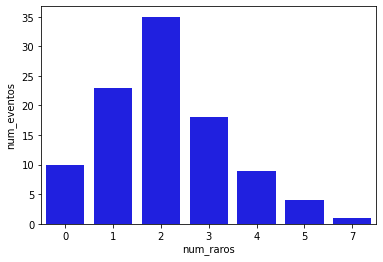

In [155]:
sns.barplot(data = tb_poisson, x = 'num_raros', y = 'num_eventos', color='blue')

In [157]:
p = 1/1e05
n = 2e05
lamb = p * n
dist_poisson = sp.stats.poisson(p*n)

In [158]:
tb_poisson['prob_medida'] = tb_poisson['num_eventos']/sum(tb_poisson['num_eventos'])
tb_poisson['prob_real'] = tb_poisson['num_raros'].apply(dist_poisson.pmf)

<AxesSubplot:xlabel='num_raros', ylabel='prob_real'>

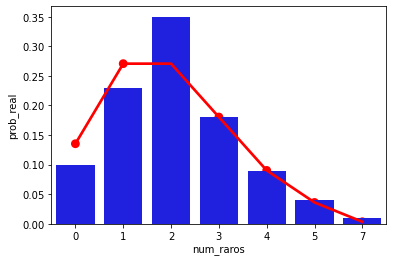

In [159]:
sns.barplot(data = tb_poisson, x = 'num_raros', y = 'prob_medida', color='blue')
sns.pointplot(data = tb_poisson, x = 'num_raros', y = 'prob_real', color='red')

### Distribuição Exponencial

In [160]:
dist_exp = sp.stats.expon(scale = 1/lamb)

<AxesSubplot:>

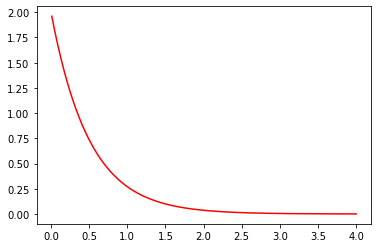

In [165]:
x = np.linspace(0.01, 4, 1000)
y = dist_exp.pdf(x)
sns.lineplot(x = x, y = y, color='red')

<AxesSubplot:>

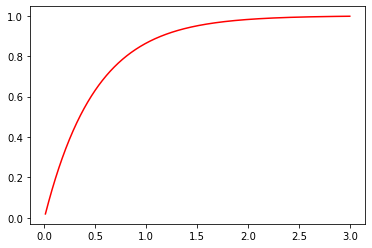

In [164]:
x = np.linspace(0.01, 3, 1000)
y = dist_exp.cdf(x)
sns.lineplot(x = x, y = y, color='red')

In [166]:
amostra_exp = dist_exp.rvs(size=100)
tb_expon = pd.DataFrame({'t' : amostra_exp})

In [167]:
tb_expon

,t
0,2.418527
1,2.082397
2,0.149240
3,1.786140
4,0.232033
...,...
95,0.013178
96,0.183268
97,0.184334
98,0.228733


In [168]:
tb_expon['t_acumulado'] = tb_expon['t'].cumsum()

In [169]:
tb_expon

,t,t_acumulado
0,2.418527,2.418527
1,2.082397,4.500924
2,0.149240,4.650164
3,1.786140,6.436304
4,0.232033,6.668337
...,...,...
95,0.013178,53.567233
96,0.183268,53.750500
97,0.184334,53.934835
98,0.228733,54.163568


In [170]:
tb_expon['minuto'] = np.floor(tb_expon['t_acumulado'])

In [171]:
tb_expon

,t,t_acumulado,minuto
0,2.418527,2.418527,2.0
1,2.082397,4.500924,4.0
2,0.149240,4.650164,4.0
3,1.786140,6.436304,6.0
4,0.232033,6.668337,6.0
...,...,...,...
95,0.013178,53.567233,53.0
96,0.183268,53.750500,53.0
97,0.184334,53.934835,53.0
98,0.228733,54.163568,54.0


In [172]:
tb_num_eventos = pd.DataFrame({'minuto' : range(0, int(max(tb_expon['minuto']) + 1))})

In [173]:
n_eventos_minuto = tb_expon.groupby('minuto')['t'].count().reset_index()  

In [174]:
n_eventos_minuto.head()

,minuto,t
0,2.0,1
1,4.0,2
2,6.0,3
3,7.0,1
4,8.0,2


In [175]:
tb_nev_min = pd.merge(tb_num_eventos, n_eventos_minuto, how = 'left', on = 'minuto')
tb_nev_min = tb_nev_min.fillna(0)
tb_nev_min = tb_nev_min.rename({'t' : 'num_chegadas'}, axis = 1)

In [177]:
tb_nev_min

,minuto,num_chegadas
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,2.0
5,5,0.0
6,6,3.0
7,7,1.0
8,8,2.0
9,9,3.0


In [178]:
tb_poiss_pro = tb_nev_min.groupby('num_chegadas').sum().reset_index()
tb_poiss_pro = tb_poiss_pro.rename({'minuto' : 'num_eventos'}, axis = 1)
tb_poiss_pro['prob_real'] = tb_poiss_pro['num_chegadas'].apply(dist_poisson.pmf)
tb_poiss_pro['prob_medida'] = tb_poiss_pro['num_eventos']/sum(tb_poiss_pro['num_eventos'])
tb_poiss_pro

,num_chegadas,num_eventos,prob_real,prob_medida
0,0.0,151,0.135335,0.101684
1,1.0,276,0.270671,0.185859
2,2.0,572,0.270671,0.385185
3,3.0,250,0.180447,0.168350
4,4.0,183,0.090224,0.123232
5,5.0,53,0.036089,0.035690


<AxesSubplot:xlabel='num_chegadas', ylabel='prob_real'>

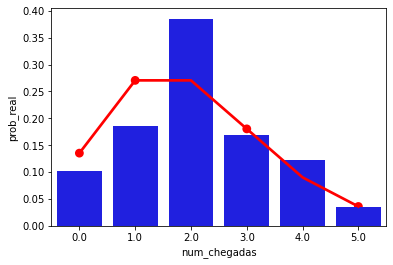

In [179]:
sns.barplot(data = tb_poiss_pro, x = 'num_chegadas', y = 'prob_medida', color = 'blue')
sns.pointplot(data = tb_poiss_pro, x = 'num_chegadas', y = 'prob_real', color='red')

### Teorema do Limite Central

In [180]:
amostra_binomial_array = np.array(amostra_binomial[0:99])
amostra_binomial[0:5]

[8, 5, 5, 6, 4]

In [181]:
amostra_geo_array = np.array(amostra_geo[0:99])
amostra_geo[0:5]

[1, 1, 2, 2, 1]

In [182]:
amostra_poi_array = np.array(amostra_poi[0:99])
amostra_poi[0:5]

[3, 2, 2, 5, 2]

In [183]:
amostra_exp_array = np.array(amostra_exp[0:99])
amostra_exp[0:5]

array([2.41852665, 2.08239741, 0.1492403 , 1.78613964, 0.23203325])

In [184]:
def norm_array(arr):
    mu_arr = np.mean(arr)
    sd_arr = np.std(arr)
    
    return (arr - mu_arr)/sd_arr

In [185]:
amostra_binomial_norm = norm_array(amostra_binomial_array)
amostra_geo_array = norm_array(amostra_geo_array)
amostra_poi_array = norm_array(amostra_poi_array)
amostra_exp_array = norm_array(amostra_exp_array)

In [186]:
amostra_norm = amostra_binomial_norm + amostra_geo_array + amostra_poi_array + amostra_exp_array

In [187]:
amostra_norm

array([ 5.19502231e+00,  1.87721248e+00, -6.41813488e-01,  5.10497178e+00,
       -1.99635050e+00, -1.52526646e+00,  1.36428689e+00, -2.59117300e+00,
       -2.54680163e+00,  4.19138528e+00,  4.48305821e-01,  9.04849876e-01,
        1.42863476e+00, -1.71769966e-01,  3.91066626e+00, -1.49879183e+00,
       -6.50153065e-01,  4.05360971e-01, -1.11454432e+00, -1.02296684e+00,
        5.27731544e-01, -8.60276708e-01, -2.01338455e+00, -4.94447904e-01,
       -1.09075530e+00,  1.63583855e+00,  5.92133305e-01, -2.63131804e+00,
        5.65639838e-01, -1.25219212e+00, -1.08838363e+00,  1.18662267e+00,
       -2.40963284e+00,  4.91051152e+00, -1.39651838e+00,  1.95534596e+00,
        8.05750005e-01,  5.32820969e-01, -2.92107650e+00, -1.59161862e+00,
        1.62898635e+00,  3.73622019e-01, -5.88989241e-01,  6.14491039e-01,
        1.79402433e+00,  6.07558706e-02, -3.17683022e-01, -1.90110266e-01,
       -6.88118910e-01, -2.11170926e+00,  3.57700876e-02, -1.48361054e+00,
       -5.96286332e-01,  

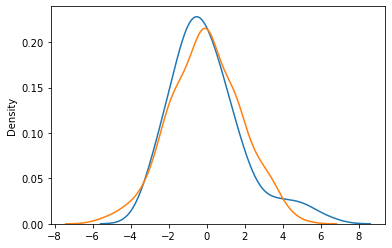

In [188]:
dist_norm = sp.stats.norm(loc = np.mean(amostra_norm), scale = np.std(amostra_norm))
random_sample = dist_norm.rvs(1000)
sns.kdeplot(amostra_norm);
sns.kdeplot(random_sample);

# Intervalo de Confiaça e RMSE

In [20]:
candidatos = ['A', 'B']
def intencao_voto():
    return np.random.choice(candidatos, p = [0.01, 0.99])

In [21]:
intencao_voto()

'B'

In [22]:
def pesquisa_opiniao(tamanho_amostra):
    pesquisa = [intencao_voto() for i in range(tamanho_amostra)]
    c_pesq = Counter(pesquisa)
    return c_pesq['A']/tamanho_amostra

In [23]:
pesquisa_opiniao(1000)

0.008

In [24]:
lista_pesquisas = [pesquisa_opiniao(100) for i in range(1000)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


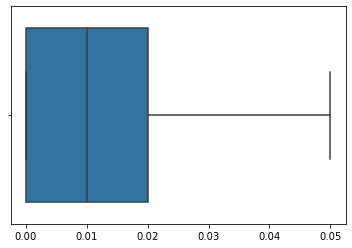

In [25]:
sns.boxplot(lista_pesquisas);

<AxesSubplot:xlabel='age', ylabel='lm_pred'>

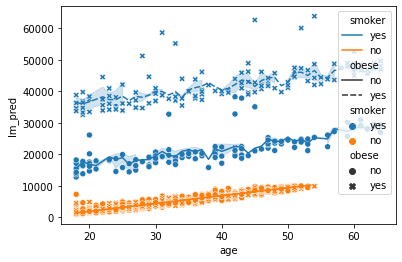

In [26]:
tb_insu = pd.read_csv('data/tb_insurance.csv')
tb_insu['out'] = np.where((tb_insu['expenses'] > 10000) & (tb_insu['smoker'] == 'no'),
                          1, 0)
tb_insu = tb_insu[tb_insu['out'] == 0].copy()
tb_insu['obese'] = np.where(tb_insu['bmi'] >= 30, 'yes', 'no')
tb_insu = tb_insu.join(pd.get_dummies(tb_insu['obese'], prefix = 'obese'))
tb_insu = tb_insu.join(pd.get_dummies(tb_insu['smoker'], prefix = 'smoker'))
tb_insu['obese_smoker'] = tb_insu['obese_yes'] * tb_insu['smoker_yes']
tb_insu['bmi_smoker'] = tb_insu['bmi'] * tb_insu['smoker_yes']

X = sm.add_constant(tb_insu[['obese_smoker', 'age', 'bmi_smoker', 'smoker_yes']])
Y = tb_insu['expenses']
modelo = sm.OLS(Y, X)
lm_fit = modelo.fit()
tb_insu['lm_pred'] = lm_fit.predict()
sns.lineplot(data = tb_insu, x = 'age', y='lm_pred', hue = 'smoker', style = 'obese')
sns.scatterplot(data = tb_insu, x = 'age', y='expenses', hue = 'smoker', style = 'obese')

In [27]:
lm_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.065e+04
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:42:59   Log-Likelihood:                -8916.8
No. Observations:                 986   AIC:                         1.784e+04
Df Residuals:                     981   BIC:                         1.787e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3003.6640    202.620    -14.824      0.000   -3401.282   -2606.046
obese_smoker  1.485e+04    420.570     35.312      0.000     1.4e+04    1.57e+04
age            248.1286      5.664     43.805      0.000     237.013     259.244
bmi_smoker     492.4567     33.282     14.796      0.000     427.144     557.769
smoker_yes    2513.1394    864.965      2.905      0.004     815.744    4210.534
==============================================================================
Omnibus:                     1048.831   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96166.509
Skew:                           4.926   Prob(JB):                         0.00
Kurtosis:                      50.368   Cond. No.                         532.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
tb_insu['resid'] = tb_insu['expenses'] - tb_insu['lm_pred']

<AxesSubplot:xlabel='resid', ylabel='Count'>

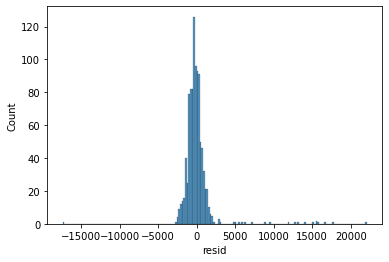

In [29]:
sns.histplot(data = tb_insu, x = 'resid')

In [30]:
rmse = np.sqrt(np.mean(tb_insu['resid']**2))

In [31]:
rmse

2047.7924002302782

In [32]:
np.std(tb_insu['resid'])

2047.7924002302786

<AxesSubplot:ylabel='Density'>

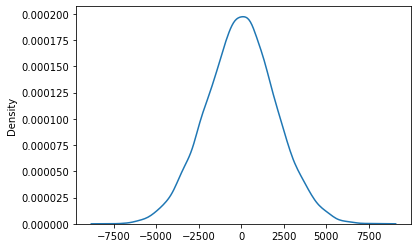

In [33]:
norm_rmse =  sp.stats.norm(loc = 0, scale = rmse)
rand_rmse = norm_rmse.rvs(10000)
sns.kdeplot(rand_rmse)

In [37]:
12000 + norm_rmse.ppf(0.025)

7986.400647733823

In [42]:
12000 + norm_rmse.ppf(0.975)

16013.599352266177

## RMSE e Complexidade

In [43]:
def simular_dado(min_x, max_X, 
                 desvpad_E, A, B,
                 samples):
    x = np.random.uniform(min_x, max_X, size = samples)
    E = np.random.normal(loc = 0, scale = desvpad_E, size = samples)
    y = B + A * x + E
    return pd.DataFrame({'x' : x, 'y' : y})

tb_simul = simular_dado(0, 10, 15, 10, 10, 100)

<AxesSubplot:xlabel='x', ylabel='y'>

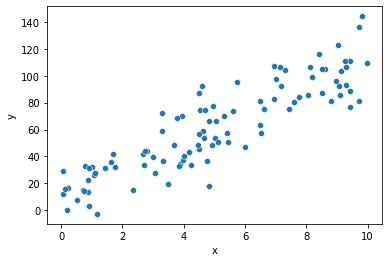

In [44]:
sns.scatterplot(data = tb_simul, x = 'x', y = 'y')

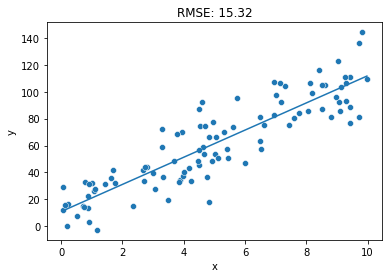

In [45]:
modelo = LinearRegression()
X = tb_simul[['x']]
Y = tb_simul['y']
modelo.fit(X, Y)

tb_simul['pred'] = modelo.predict(X)
tb_simul['erro_2'] = (tb_simul['pred'] - tb_simul['y'])**2
rmse = np.sqrt(np.mean(tb_simul['erro_2']))
sns.scatterplot(data = tb_simul, x = 'x', y = 'y');
sns.lineplot(data = tb_simul, x = 'x', y = 'pred');
plt.title("RMSE: " + str(round(rmse, 2)));

In [46]:
modelo = LinearRegression()
tb_simul['x_2'] = tb_simul['x'] ** 2
tb_simul['x_3'] = tb_simul['x'] ** 3
tb_simul.head()

,x,y,pred,erro_2,x_2,x_3
0,3.878153,34.210025,50.042740,250.674854,15.040070,58.327694
1,8.108020,106.793389,92.802624,195.741500,65.739992,533.021179
2,8.409902,116.441403,95.854359,423.826411,70.726452,594.802528
3,2.713762,33.204391,38.271870,25.679340,7.364505,19.985515
4,4.743115,36.258523,58.786671,507.517465,22.497138,106.706510


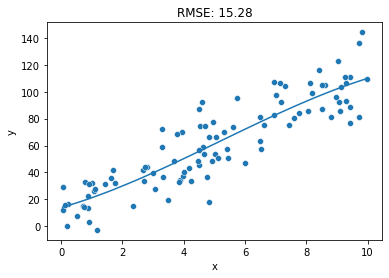

In [47]:
X = tb_simul[['x', 'x_2', 'x_3']]
Y = tb_simul['y']
modelo.fit(X, Y)

tb_simul['pred'] = modelo.predict(X)
tb_simul['erro_2'] = (tb_simul['pred'] - tb_simul['y'])**2
rmse = np.sqrt(np.mean(tb_simul['erro_2']))
sns.scatterplot(data = tb_simul, x = 'x', y = 'y');
sns.lineplot(data = tb_simul, x = 'x', y = 'pred');
plt.title("RMSE: " + str(round(rmse, 2)));

In [48]:
for i in range(4, 21):
    tb_simul['x_' + str(i)] = tb_simul['x'] ** i

In [49]:
tb_simul.head()

,x,y,pred,erro_2,x_2,x_3,x_4,x_5,x_6,x_7,...,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20
0,3.878153,34.210025,48.904698,215.933413,15.040070,58.327694,226.203719,877.252623,3402.119863,1.319394e+04,...,2.984519e+06,1.157442e+07,4.488737e+07,1.740801e+08,6.751092e+08,2.618177e+09,1.015369e+10,3.937756e+10,1.527122e+11,5.922413e+11
1,8.108020,106.793389,94.007057,163.490287,65.739992,533.021179,4321.746488,35040.807815,284111.577539,2.303582e+06,...,9.955499e+09,8.071939e+10,6.544744e+11,5.306492e+12,4.302514e+13,3.488487e+14,2.828473e+15,2.293331e+16,1.859438e+17,1.507636e+18
2,8.409902,116.441403,96.853459,383.687554,70.726452,594.802528,5002.230971,42068.272263,353790.047182,2.975340e+06,...,1.488334e+10,1.251674e+11,1.052646e+12,8.852646e+12,7.444988e+13,6.261162e+14,5.265576e+15,4.428298e+16,3.724155e+17,3.131978e+18
3,2.713762,33.204391,36.782801,12.805020,7.364505,19.985515,54.235935,147.183427,399.420814,1.083933e+03,...,5.878812e+04,1.595370e+05,4.329454e+05,1.174911e+06,3.188429e+06,8.652638e+06,2.348120e+07,6.372239e+07,1.729274e+08,4.692839e+08
4,4.743115,36.258523,58.322347,486.812357,22.497138,106.706510,506.121228,2400.591101,11386.279236,5.400643e+04,...,2.733380e+07,1.296474e+08,6.149323e+08,2.916694e+09,1.383422e+10,6.561728e+10,3.112303e+11,1.476201e+12,7.001791e+12,3.321030e+13


In [51]:
def calcular_erro(dados, X_names, Y_name):
    modelo = LinearRegression()
    X = dados[X_names]
    Y = dados[Y_name]
    modelo.fit(X, Y)
    
    dados['pred'] = modelo.predict(X)
    dados['erro_2'] = (dados['pred'] - dados[Y_name])**2
    rmse = np.sqrt(np.mean(dados['erro_2']))
    return round(rmse, 2)

In [52]:
print("Polinomio Grau:" + str(1) + " RMSE:" + str(calcular_erro(tb_simul, ['x'], 'y')))
for poly in range(2, 21):
    var_x = ['x_' + str(i) for i in range(2, poly+1)] + ['x']
    print("Polinomio Grau:" + str(poly) + " RMSE:" + str(calcular_erro(tb_simul, var_x, 'y')))

Polinomio Grau:1 RMSE:15.32
Polinomio Grau:2 RMSE:15.31
Polinomio Grau:3 RMSE:15.28
Polinomio Grau:4 RMSE:15.28
Polinomio Grau:5 RMSE:15.25
Polinomio Grau:6 RMSE:15.06
Polinomio Grau:7 RMSE:15.03
Polinomio Grau:8 RMSE:14.97
Polinomio Grau:9 RMSE:14.9
Polinomio Grau:10 RMSE:14.9
Polinomio Grau:11 RMSE:14.88
Polinomio Grau:12 RMSE:14.88
Polinomio Grau:13 RMSE:14.75
Polinomio Grau:14 RMSE:14.81
Polinomio Grau:15 RMSE:14.72
Polinomio Grau:16 RMSE:14.68
Polinomio Grau:17 RMSE:14.76
Polinomio Grau:18 RMSE:14.87
Polinomio Grau:19 RMSE:15.3
Polinomio Grau:20 RMSE:15.43


Text(0.5, 1.0, 'RMSE: 14.87')

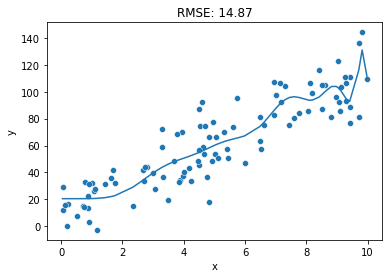

In [53]:
X = tb_simul[[
    'x', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10',
    'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18'
]]
Y = tb_simul['y']
modelo.fit(X, Y)

tb_simul['pred'] = modelo.predict(X)
tb_simul['erro_2'] = (tb_simul['pred'] - tb_simul['y'])**2
rmse = np.sqrt(np.mean(tb_simul['erro_2']))
sns.scatterplot(data=tb_simul, x='x', y='y')
sns.lineplot(data=tb_simul, x='x', y='pred')
plt.title("RMSE: " + str(round(rmse, 2)))

In [60]:
def calcular_erro_teste(dados, X_names, Y_name):
    modelo = LinearRegression()
    dados_train = dados[0:80].copy()
    dados_teste = dados[80:].copy()
    X = dados_train[X_names]
    Y = dados_train[Y_name]
    modelo.fit(X, Y)
    
    X_teste = dados_teste[X_names]
    dados_teste['pred'] = modelo.predict(X_teste)
    dados_teste['erro_2'] = (dados_teste['pred'] - dados_teste[Y_name])**2
    rmse = np.sqrt(np.mean(dados_teste['erro_2']))
    return rmse

In [61]:
print("Polinomio Grau:" + str(1) + " RMSE:" + str(calcular_erro(tb_simul, ['x'], 'y')))
for poly in range(2, 21):
    var_x = ['x_' + str(i) for i in range(2, poly+1)] + ['x']
    print("Polinomio Grau:" + str(poly) + " RMSE:" + str(calcular_erro_teste(tb_simul, var_x, 'y')))

Polinomio Grau:1 RMSE:15.32
Polinomio Grau:2 RMSE:18.73484102258406
Polinomio Grau:3 RMSE:20.217010043703873
Polinomio Grau:4 RMSE:20.314708098551517
Polinomio Grau:5 RMSE:20.367240519229227
Polinomio Grau:6 RMSE:20.111711168836106
Polinomio Grau:7 RMSE:20.21437237141245
Polinomio Grau:8 RMSE:20.431379716070065
Polinomio Grau:9 RMSE:20.301369684573952
Polinomio Grau:10 RMSE:20.3913075223643
Polinomio Grau:11 RMSE:20.327099269258383
Polinomio Grau:12 RMSE:20.33476612790501
Polinomio Grau:13 RMSE:20.19545666244763
Polinomio Grau:14 RMSE:20.084626835643395
Polinomio Grau:15 RMSE:19.481818984931724
Polinomio Grau:16 RMSE:19.248915687366825
Polinomio Grau:17 RMSE:19.353524706491665
Polinomio Grau:18 RMSE:19.27718026400203
Polinomio Grau:19 RMSE:19.527425316042876
Polinomio Grau:20 RMSE:19.64725026629024
